In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
aviation=pd.read_csv("faa_ai_prelim.csv")

In [3]:

aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

In [4]:
aviation.sample(10)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
63,No,09-FEB-16,08-FEB-16,00:00:00Z,EUGENE,Oregon,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, EUGENE, OR",Incident,FAA Portland FSDO-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,No,08-FEB-16,06-FEB-16,14:17:00Z,EL PASO,Texas,NaN,SOUTHWEST AIRLINES FLIGHT SWA3817 BOEING 737 A...,Incident,FAA Lubbock FSDO-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,No,17-FEB-16,15-FEB-16,16:12:00Z,PHOENIX,Arizona,NaN,"N2194X FIREFLY 9 BALLOON, ON LANDING STRUCK TH...",Incident,FAA Scottsdale FSDO-07,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,No,17-FEB-16,16-FEB-16,17:29:00Z,BENCHLEY,Texas,NaN,AIRCRAFT FORCE LANDED IN A FIELD 2 MILES FROM ...,Accident,FAA Houston FSDO-09,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,18-FEB-16,17-FEB-16,18:10:00Z,WINTER HAVEN,Florida,NaN,"AIRCRAFT ON LANDING GEAR COLLAPSED, WINTER HAV...",Incident,FAA Orlando FSDO-15,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,No,09-FEB-16,08-FEB-16,18:58:00Z,GOLD BEACH,Oregon,NaN,AIRCRAFT ON LANDING WENT OFF THE RUNWAY INTO A...,Accident,FAA Portland FSDO-09,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,No,16-FEB-16,13-FEB-16,16:30:00Z,PETALUMA,California,NaN,"N3647A AEROSTAR INTERNATIONAL RX8 BALLOON, ON ...",Accident,FAA Oakland FSDO-27,...,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,No,18-FEB-16,17-FEB-16,15:40:00Z,NEWPORT NEWS,Virginia,NaN,AIRCRAFT ON LANDING WENT OFF THE RUNWAY INTO A...,Incident,FAA Richmond FSDO-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,No,16-FEB-16,14-FEB-16,19:30:00Z,COSTA MESA,California,NaN,AIRCRAFT ON LANDING GROUND LOOPED AND GEAR COL...,Accident,FAA Long Beach FSDO-05,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,No,11-FEB-16,11-FEB-16,00:17:00Z,TULARE,California,NaN,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,Accident,FAA Fresno FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

def preprocess_dataset(df, target_col=None):
    # Drop target column if specified
    df_clean = df.drop(columns=[target_col], errors="ignore").copy()

    # Separate numeric & categorical
    num_cols = df_clean.select_dtypes(include=["number"]).columns
    cat_cols = df_clean.select_dtypes(exclude=["number"]).columns

    # Fill NaNs
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
    df_clean[cat_cols] = df_clean[cat_cols].fillna("Missing")

    # One-hot encode categoricals
    df_clean = pd.get_dummies(df_clean, drop_first=True)

    # Fill any leftover NaNs (safety step for aviation dataset)
    df_clean = df_clean.fillna(0)

    # Convert bools → int
    for col in df_clean.columns:
        if df_clean[col].dtype == "bool":
            df_clean[col] = df_clean[col].astype(int)

    return df_clean


# Apply preprocessing
aviation_preprocessed = preprocess_dataset(aviation)


In [6]:
print(aviation_preprocessed.shape)
aviation_preprocessed.sample(5)

(83, 559)


,ACFT_MISSING_FLAG,FAR_PART,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CBN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,...,FLT_PHASE_Missing,FLT_PHASE_STANDING (STD),FLT_PHASE_TAKEOFF (TOF),FLT_PHASE_TAXI (TXI),FLT_PHASE_UNKNOWN (UNK),MAX_INJ_LVL_Minor,MAX_INJ_LVL_Missing,MAX_INJ_LVL_Serious,MAX_INJ_LVL_Unknown,FATAL_FLAG_Yes
72,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
64,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
27,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
40,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
50,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
scaler= StandardScaler()
aviation_scaled = scaler.fit_transform(aviation_preprocessed)

In [8]:
def pca_reconstruction_error(X, ks):
    
    # Step 1: Mean center
    mu = X.mean(axis=0)
    A = X - mu
    
    # Step 2: Compute A^T A
    ATA = A.T @ A
    
    # Step 3: Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(ATA)
    
    # Sort eigenvalues descending
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    errors = []
    for k in ks:
        # Step 4: Take top-k eigenvectors
        Ek = eigvecs[:, :k]
        
        # Step 5: Project & reconstruct
        W = A @ Ek         # projections
        L = W @ Ek.T       # linear combinations
        R = L + mu         # reconstructed points
        
        # Step 6: Compute error
        err = np.sum((X - R)**2)
        errors.append((k, err))
    
    return pd.DataFrame(errors, columns=["k", "reconstruction_error"])


In [9]:
ks = [1, 2, 3, 5, 7, 10, 15]

aviation_errors = pca_reconstruction_error(aviation_scaled, ks)
avi_err=pca_reconstruction_error(aviation_scaled,ks)

In [10]:
avi_err

,k,reconstruction_error
0,1,43867.197028
1,2,42899.008809
2,3,42006.476595
3,5,40323.284513
4,7,38696.157995
5,10,36420.025651
6,15,32853.136582


Housing Reconstruction Errors:
     k  reconstruction_error
0   1          43867.197028
1   2          42899.008809
2   3          42006.476595
3   5          40323.284513
4   7          38696.157995
5  10          36420.025651
6  12          34971.497586
7  15          32853.136582
8  17          31484.675212


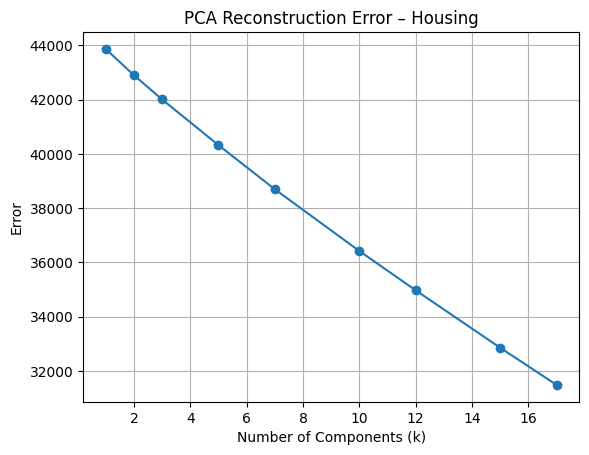

In [12]:

ks = [1,2,3,5,7,10,12,15,17]   
house_res = pca_reconstruction_error(aviation_scaled, ks)
print("Housing Reconstruction Errors:\n", house_res)

plt.plot(house_res["k"], house_res["reconstruction_error"], marker="o")
plt.title("PCA Reconstruction Error – Housing")
plt.xlabel("Number of Components (k)")
plt.ylabel("Error")
plt.grid(True)
plt.show()
